# chapter4.1 
# Generative learning algorithms

---

# import 

In [74]:
import numpy as np
import matplotlib.pyplot as plt

---

정리할 개념 

- 베이즈 룰
- 최대우도법
- 다변수 정규분포, 공분산 행렬
- GDA 구현과 로지스틱회귀모형과의 비교

---

# 0. intro
p34

"Algorithms that try to learn p(y|x) directly (such as logistic regression),
or algorithms that try to learn mappings directly from the space of inputs X
to the labels {0, 1}, (such as the perceptron algorithm) are called discriminative learning algorithms."

- discriminative learning algorithms

        p(y|x)를 직접 학습하려는 알고리즘 또는 입력 공간에서 직접 매핑을 배우려고 시도하는 알고리즘

"Here, we’ll talk about algorithms that instead
try to model p(x|y) (and p(y)). These algorithms are called generative
learning algorithms."

- generative learning algorithms 

        p(x|y)(및 p(y))를 모형화하고. 이러한 알고리즘을 생성 알고리즘이라고 합니다"

"For instance, if y indicates whether an example is a
dog (0) or an elephant (1), then p(x|y = 0) models the distribution of dogs’
features, and p(x|y = 1) models the distribution of elephants’ features"

- 예시

        y는 강아지는 0, 코끼리는 1을 나타낸다면 p(x|y=0)은 강아지의 특성에 따른 분포를 모델링 하고 반대의 경우 코끼리의 특성에 다른 분포를 모델링합니다.

"After modeling p(y) (called the class priors) and p(x|y), our algorithm
can then use Bayes rule to derive the posterior distribution on y given x"

        모델링 이후 베이즈 룰을 이용하여 주어진 x에 대한 사후 분포를 도출합니다.

`-`
사전 정보를 바탕으로 사후 확률을 업데이트 

$$
P(H|E) = \frac{P(E|H) \cdot P(H) }{P(E)}
$$

`-`
$$
P(E) = \sum_{i = 1}^n P(H)\cdot P(E|H)
$$

`-` 베이즈 정리 활용

1. 역확률 문제
2. 데이터를 이용한 사후 확률의 추정


출처 :https://blog.naver.com/mykepzzang/22083494079


"the denominator is given by p(x) = p(x|y = 1)p(y = 1) + p(x|y =
0)p(y = 0) (you should be able to verify that this is true from the standard
properties of probabilities), and thus can also be expressed in terms of the
quantities p(x|y) and p(y) that we’ve learned.if were calculating
p(y|x) in order to make a prediction, then we don’t actually need to calculate
the denominator"(35p)

- 분모 p(x) = p(x|y = 1)p(y = 1) + p(x|y = 0)p(y = 0) 주어짐
- p(x|y) and p(y) 우리가 알고있음
- 분모는 계산하지 않음 따라서 분자에 있는 확률을 구하면 된다.

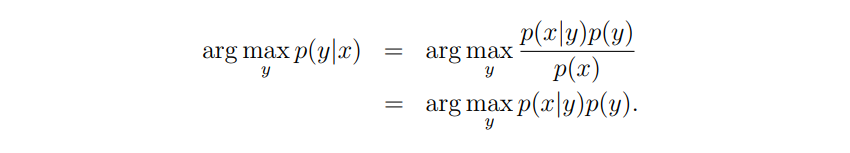

---

# 0. bayes rule 정리내용

`-` 출처 : https://www.youtube.com/watch?v=euH9C61ywEM

- 전통적인 관점 : 빈도주의
- 새로운 관점 : 베이지안 주의

*확률을 주장에 대한 신뢰도로 해석하는 관점*

$$
P(H|E) = \frac{P(E|H) \cdot P(H) }{P(E)}
$$

- H : 가설 혹은 어떤 사건이 발생했다는 주장, True
- E : 새로운 정보, Positive
- P(H) : 어떤 사건이 발생했다는 주장에 관한 신뢰도
- P(H|E) : 새로운 정보를 받은 후 갱신된 신뢰도
    

![](https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-01-09-Bayes_rule/pic2.png)
출처:https://angeloyeo.github.io/2020/01/09/Bayes_rule.html

`-` 실습 예시1(역확률 문제)

- 희귀병 양성 판정의 정확성 95%
- 전 세계에서 해당 희귀병에 걸린 환자 0.001%

양성판정을 받았을 때, 실제 희귀병에 걸린 확률은?

$$
\frac{P(E|H) \cdot P(H) }{P(E|H) \cdot P(H)+P(E|H^c) \cdot P(H^c)}
$$

In [712]:
0.99*0.001 / (0.99*0.001 + 0.01*0.999)

0.09016393442622951

비록 양성 판정의 정확성이 95%일지라도 희귀병에 걸릴 확률이 매우 적기 때문에 
양성 판정을 받을 확률은 10%가 되지 않는다.

`-` 실습 예시2(데이터를 이용한 사후 확률의 추정)

- 유튜브 영상을 보고 좋아요를 누를 확률 : 0.3
- 유튜브 게임영상을 보고 좋아요를 누를 확률 : 0.8

유튜브 영상에 좋아요를 눌렀을 때, 게임영상일 확률

In [61]:
X = 5/10 # 유튜브 영상을 보고 내가 좋아요를 누를 확률 
_X = 1-X # 유튜브 영상을 보고 내가 좋아요를 누르지 않을 확률 

# 게임분야를 더 선호
Y = 8/10 # 유튜브 영상 게임관련 분야 영상을 내가 좋아요를 누른 확률 
_Y = 2/10 # 

X, X*Y/(X*Y +_X*_Y)
print(f'사전확률 : {X}\n사후확률 : {X*Y/(X*Y +_X*_Y)}')

사전확률 : 0.5
사후확률 : 0.8


백지상태인 알고리즘은 우리가 무엇을 좋아할지 특정한 방향성 없이 영상을 추천하지만 우리가 추천을 준 분야 계속 확인하여 관심 분야의 영상이 더 자주뜨게 알고리즘이 작동된다.

---

# 1. gaussian 정규분포
35p

직관적인 예시 

        A반과 B반이 있다. 각 반은 동일한 시험을 보았고 평균 점수는 각각 90점과 75점으로 나왔다. 어떠한 학생이 73점을 맞았다면 또한 각 반의 분산이 일정하고 정규분포를 대략 따르고 있다면 그 학생의 반은 A반일까 B반일까
        
        
아마도 B반에 그 학생이 위치할 확률은 지극히 작을 것이고 알고리즘은 더 높은 확률을 가진 A반으로 선택할 것이다.

"The first generative learning algorithm that we’ll look at is Gaussian discriminant analysis (GDA). In this model, we’ll assume that p(x|y) is distributed
according to a multivariate normal distribution. Let’s talk briefly about the
properties of multivariate normal distributions before moving on to the GDA
model itself.
"

        생성 알고리즘으로 우리는 GDA를 살펴보겠습니다. 이 모델은 다변수 정규분포에 따라 P(x|y)를 가정합니다.
    모델을 알아보기 전에 다변수 정규분포가 무엇인지 말해봅시다,

The multivariate normal distribution in d-dimensions, also called the multivariate Gaussian distribution, is parameterized by a mean vector µ ∈ R
d
and a covariance matrix Σ ∈ R
d×d
, where Σ ≥ 0 is symmetric and positive
semi-definite. Also written “N (µ, Σ)”, its density is given by:


$$
p(x;\mu,\sum) = \frac{1}{2\pi^{d/2}|{\sum}|^{1/2}}exp(-\frac{1}{2}(x-\mu)^T\sum{^-1}(x-\mu))
$$

- $|\sum|  = det(\sum)$

        d차원을 가지고 있는 다변수 정규분포는 평균벡터와 공분산 d*d을 가집니다. 공분산 매트릭스는 대칭행렬이고 대각을 기준으로 양의 반정형입니다.
        밀도함수는 위와 같습니다.


---

`-` 정규분포의 확률밀도함수

$$
p(x;\mu,\sum) = \frac{1}{2\pi^{1/2}\sigma}exp(-\frac{1}{2}\cdot \frac{(x-\mu)^2}{\sigma^2})
$$

정규분포를 나타내는 확률밀도함수식에서 분산을 공분산으로 바꾸어준 것 뿐!

$$
P(X_1 = x_1, X_2 = x_2) = Px_1(x_1)Px_2(x_2) \\
\sim exp(-\frac{1}{2} \cdot \frac{(x_1 - \mu_{x1})^2}{\sigma^2_{x1}}) \cdot
exp(-\frac{1}{2} \cdot \frac{(x_2 - \mu_{x2})^2}{\sigma^2_{x2}}) \\
\sim exp(-\frac{1}{2}(\frac{(x_1 - \mu_{x1})^2}{\sigma^2_1}+\frac{(x_2 - \mu_{x2})^2}{\sigma^2_2}))
$$

행렬로 표현해보자

$$ \frac{(x_1 - \mu_{x1})^2}{\sigma^2_1}+\frac{(x_2 - \mu_{x2})^2}{\sigma^2_2}
$$

$$
X = 
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
\
\mu = 
\begin{bmatrix}
\mu_1\\
\mu_2
\end{bmatrix}
\
\sum = 
\begin{bmatrix}
\sigma_1\\
\sigma_2
\end{bmatrix}
$$

행렬식 표현

$$
(X-\mu)^T\sum{^-1}(X-\mu)
$$

---

`-` 공분산 정의

$$
\sum = 
\begin{bmatrix}
\sigma_{11} & \cdots & cov(X_{1},X_{n}) \\
\vdots & \ddots & \vdots \\
cov(X_{n},X_{1}) & \cdots & \sigma_{ii}
\end{bmatrix}
$$

`-` 공분산 매트릭스

$$
cov(Z)= \sum \\
= E[(Z-E(Z))(Z-E(Z)^T)]
$$

The covariance of a vector-valued random variable Z is defined as Cov(Z) =
E[(Z − E[Z])(Z − E[Z])T
]. This generalizes the notion of the variance of a
real-valued random variable. The covariance can also be defined as Cov(Z) =
E[ZZT
]−(E[Z])(E[Z])T
. (You should be able to prove to yourself that these
two definitions are equivalent.)

        벡터 랜덤 변수 Z의 공분산은 위와 같이 정의가 된다. 이것은 랜덤 변수의 분산 개념을 일반화한 것이다. 또한 공분산은
    Cov(Z) = E[ZZT ]−(E[Z])(E[Z])T로 정의가 된다

`-` 증명

$$
E[(Z-E(Z))(Z-E(Z)^T)] = \\
E[{ZZ^T-E(Z)Z^T-E(Z)^TZ+E(Z)E(Z)^T}] = \\
E(ZZ^T) - E(Z)E(Z^T) - E(Z)^TE(Z)+E(Z)E(Z)^T = \\
E(ZZ^T)- E(Z)E(Z^T)
$$

`-` 공분산행렬 예시

In [516]:
np.random.seed(10)
x1 = np.random.randn(10).round(2)
x2 = np.random.randn(10).round(2)*np.pi*1/2
Z = np.matrix([x1,x2])

In [517]:
((Z-np.mean(Z,axis=1)) @ (Z-np.mean(Z,axis=1)).T) /9

matrix([[0.63006667, 0.44203954],
        [0.44203954, 2.26036147]])

In [518]:
np.cov(Z)

array([[0.63006667, 0.44203954],
       [0.44203954, 2.26036147]])

---

`-` 정규분포의 확률 밀도 함수

In [567]:
mu = 0
sigma =1 
x = np.arange(-10,10,0.1)

In [568]:
def f(x,mu,sigma) : 
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-1/2 * ((x-mu)**2/(sigma)**2))

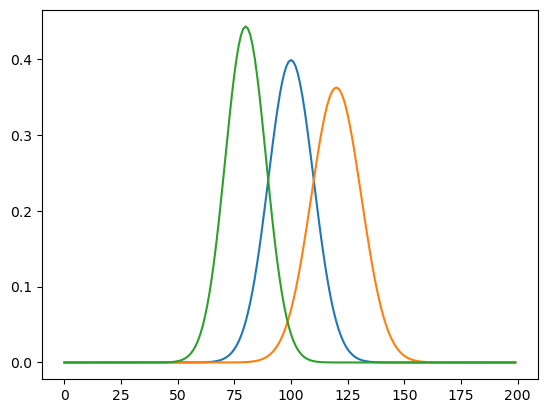

<Figure size 1000x600 with 0 Axes>

In [569]:
plt.plot(f(x,mu,sigma))
plt.plot(f(x,2,sigma*1.1))
plt.plot(f(x,-2,sigma*9/10))
plt.figure(figsize = (10,6));

평균에 따라 위치가 변하고 분산에 따라 첨도가 달라진다.

`-` 다변수 정규분포 확률밀도함수 

In [754]:
def f(x): 
    mu=np.mean(x,axis=1)
    d = x.shape[0]
    sigma = np.cov(x)
    a = 1/(2*np.pi**(d/2)*np.sqrt(np.linalg.det(sigma)))
    b =np.exp(-1/2 *(x-mu).T*np.linalg.inv(sigma)*(x-mu))
    return a*b

In [761]:
ggg = np.matrix([1+np.random.randn(100),1+np.random.randn(100)])
f(ggg).shape

(100, 100)

---

36p
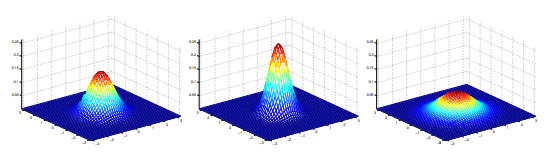

"The left-most figure shows a Gaussian with mean zero (that is, the 2x1
zero-vector) and covariance matrix Σ = I (the 2x2 identity matrix). A Gaussian with zero mean and identity covariance is also called the standard normal distribution. The middle figure shows the density of a Gaussian with
zero mean and Σ = 0.6I; and in the rightmost figure shows one with , Σ = 2I.
We see that as Σ becomes larger, the Gaussian becomes more “spread-out,”
and as it becomes smaller, the distribution becomes more “compressed.”
"

        평균은 전부 0이고 공분산행렬에 따른 모형의 분포 차이이다. 단순하게 말하면 평균이 같으니 위치는 동일하고 분산은 분포의 첨도와 관련이 있다. 왼쪽 모형의 공분산이 I라고 할때, 중앙의 모형은 공분산이 0.6I, 오른쪽 모형은 공분산이 2I이다. 따라서 공분산행렬의 크기만 다르기에 모형의 첨도만 다름을 알 수 있다.
        분산이 커질수록 "spread-out"해지고 분산이 작아질스록 "compressed"해짐

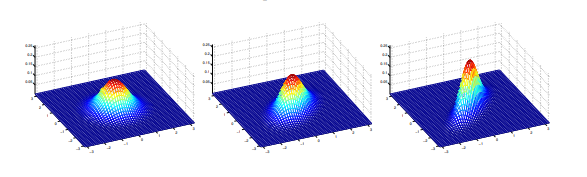

        위의 그래프들은 평균은 0으로 동일하고 공분산 행렬의 값의 크기를 밑과 같이 조정한 결과이다
    

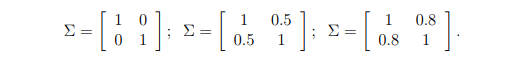

"The leftmost figure shows the familiar standard normal distribution, and we
see that as we increase the off-diagonal entry in Σ, the density becomes more
“compressed” towards the 45◦
line (given by x1 = x2). We can see this more
clearly when we look at the contours of the same three densities:"

        공분산은 두 변수의 선형의 관계를 나타낸다. 따라서 공분산의 값이 존재한다는 것은 두 변수가 어떠한 선형관계를 가진다는 의미, 또한 분산은 그대로이고 공분산의 값이 증가할 수록 위 그림과 같이 오른쪽 45도 각도로 점점 눌려지는 것을 알 수 있다. 반대로 공분산의 값이 감소할 경우는 왼쪽 45각도로 기울어지며 눌려진다.

---

37p 끝부분

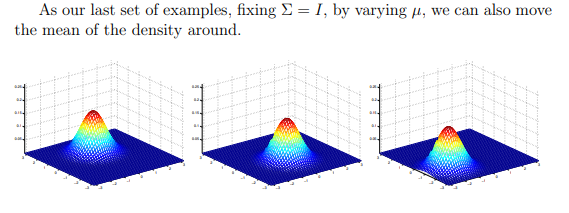

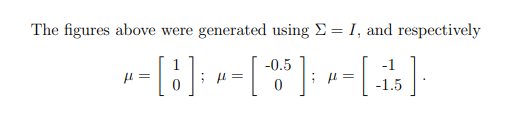

        마지막으로 평균벡터 값을 변화하면 공분산이 그대로이니 분포의 모양은 변하지 않고 분포가 위치하고 있는 좌표상의 변화가 보인다

---

# 3. the gaussian discriminant analysis model
38p

"When we have a classification problem in which the input features x are
continuous-valued random variables, we can then use the Gaussian Discriminant Analysis (GDA) model, which models p(x|y) using a multivariate normal distribution"

        분류에 문제에 있어 x가 연속형 랜덤 변수일 때, 다변수 정규분포를 이용하여 모델링하는 GDA를 사용이 가능하다.

$$
y \sim Bernoulli(\phi) \\
x|y = 0 \sim N(\mu_0,\sum)\\
x|y = 1 \sim N(\mu_1,\sum)
$$

- 해당 정규분포에 속해있을 때 0일 확률 or
- 해당 정규분포에 속해있을 때 1일 확률

`-` 분포

$$
p(y) = \phi^{y_i} \cdot (1- \phi^{1-y_i}) \\
p(x|y = 0) = \frac{1}{2\pi^{d/2}|{\sum}|^{1/2}}exp(-\frac{1}{2}(x-\mu_0)^T\sum{^-1}(x-\mu_0))  \\ 
p(x|y = 1) = \frac{1}{2\pi^{d/2}|{\sum}|^{1/2}}exp(-\frac{1}{2}(x-\mu_1)^T\sum{^-1}(x-\mu_1))
$$

"Here, the parameters of our model are φ, Σ, µ0 and µ1. (Note that while
there’re two different mean vectors µ0 and µ1, this model is usually applied
using only one covariance matrix Σ.) "

        우리가 추정해야할 모델은 φ, Σ, µ0 and µ1이고 평균벡터는 2개이지만 공분산 행렬은 하나이다. 또한 최대우도법을 통해 파라미터의 the maximum likelihood extimate of the parameters를 찾아냄

"Shown in the figure are the training set, as well as the contours of the
two Gaussian distributions that have been fit to the data in each of the
two classes. Note that the two Gaussians have contours that are the same
shape and orientation, since they share a covariance matrix Σ, but they have
different means µ0 and µ1."

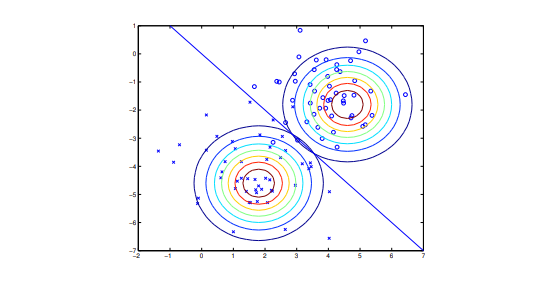

        위의 figure는 train set 정보와 함께 두개의 정규분포를 나타내는 등고선이 보인다. 이들의 등고선 형태는 서로 같다 그 이유는 공분산은 공유하지만 평균만 다르기 때문이다. 
        또한 저 직선은 p(y = 1|x) = 0.5의 decision boundary이다. 직선을 기준으로 1과 0을 예측할 것임

`-` 실습(gpt)

In [730]:
from scipy.stats import multivariate_normal

class GaussianDiscriminantAnalysis:
    def fit(self, X, y):
        self.classes = np.unique(y) # 2,
        self.n_classes = len(self.classes) # 2
        self.priors = np.zeros(self.n_classes) # 2,
        self.means = []
        self.covariances = []

        for i, c in enumerate(self.classes):
            X_class = X[y == c]
            self.priors[i] = len(X_class) / len(X) # 0.5, 0.5

            # Estimate mean and covariance
            mean = np.mean(X_class, axis=0)
            covariance = np.cov(X_class.T)
            self.means.append(mean) # 2개의 2, 평균벡터
            self.covariances.append(covariance) # 2개의 공분산 행렬
            # 2개의 다변수 정규분포를 학습
    def predict(self, X):
        y_pred = np.zeros(len(X)) # x_train 200*2- > 200,
        for i, x in enumerate(X): # 인덱스와 데이터값
            posteriors = []
            for j in range(self.n_classes): # 각 클래스만큼 반복
                likelihood = multivariate_normal.pdf(x, self.means[j], self.covariances[j])
                posterior = likelihood * self.priors[j]
                posteriors.append(posterior)

            y_pred[i] = self.classes[np.argmax(posteriors)]
# list에서 가장 큰 조건부확률을 가지는 클래스의 인덱스를 구함
# 2개의 분포중 누가 더 큰 확률을 가지느냐
        return y_pred

    def plot_decision_boundary(self, X, y):
        h = 0.02  # step size in the mesh

        # Create a mesh grid of points
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # Predict the class for each point in the mesh grid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Create a contour plot of the decision boundary
        plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('GDA Decision Boundary')
        plt.show()


In [743]:
#mean1= [0, 0]
#cov2 = [[1, 0], [0, 1]]
mean = np.mean(X_train[y_train==0], axis=0)
covariances=np.cov(X_train[y_train==0].T)

dd= multivariate_normal.pdf(np.array([0,0]), mean, covariances)
ddd=multivariate_normal.pdf(np.array([3,3]), mean, covariances)

dd, ddd

(0.15034340294652537, 3.463317540503274e-05)

---

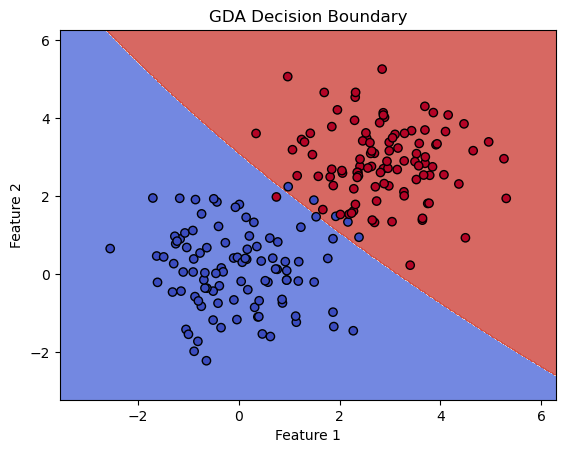

In [731]:
# 훈련 데이터 생성
np.random.seed(0)
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
X1 = np.random.multivariate_normal(mean1, cov1, 100) # 100*2
y1 = np.zeros(100)

mean2 = [3, 3]
cov2 = [[1, 0], [0, 1]]
X2 = np.random.multivariate_normal(mean2, cov2, 100)
y2 = np.ones(100)

X_train = np.vstack((X1, X2))  # 200*2
y_train = np.concatenate((y1, y2)) #200,

# GDA 모델 생성 및 훈련
gda_model = GaussianDiscriminantAnalysis()
gda_model.fit(X_train, y_train)

# 훈련 데이터 시각화
gda_model.plot_decision_boundary(X_train, y_train)


In [694]:
# 테스트 데이터 생성
X_test = np.array([[-1,-1],[0,0],[1, 1], [2, 2],[3,3], [4, 4]])

# 테스트 데이터 예측
gda_model.predict(X_test)

print("Predictions:", y_pred)

Predictions: [0. 0. 0. 1. 1. 1.]


---

# 4.  Discussion: GDA and logistic regression

`-` 요약

            GDA가 로지스틱 회귀보다 데이터에 대해 더 정규성이라는 강력한 가정이 있다. 분포의 가정이 만족해보인다면 GDA가 더 성능이 더 좋을 것.
            반대로 비교적 더 약한 가정인 로지스틱 모델은 robust하고 잘못된 가정에 덜 민감하다. 데이터가 정규분포가 실제로 아닌경우 로지스틱 모델이 더 성능이 좋아서 로지스틱이 더 자주 사용된다.
    

`-` 강한 조건이 있다는 것

- 입력데이터 까다로움
- 모델링의 까다로움
- 조건을 만족하지 못할 때, 성능 저하

유연하지 못하고 일반화하기 어렵다. 그러나 조건이 만족된다면 좋은 성능과 해석을 할 수 있을 것 

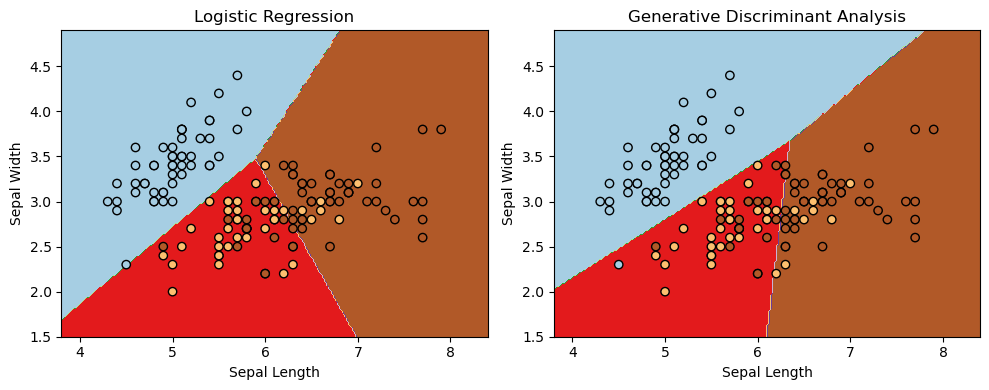

In [649]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data[:, :2]  # 첫번째와 두번째 특성만 사용
y = iris.target

# 모델 초기화
logreg = LogisticRegression()
gda = LinearDiscriminantAnalysis()

# 모델 훈련
logreg.fit(X, y)
gda.fit(X, y)

# 결정 경계 그리기 함수
def plot_decision_boundary(model, X, y):
    h = .02  # 그리드 단위
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

# 그래프 그리기
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plot_decision_boundary(logreg, X, y)
plt.title('Logistic Regression')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(1, 2, 2)
plot_decision_boundary(gda, X, y)
plt.title('Generative Discriminant Analysis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()


In [744]:
# 예측값 계산
y_pred_logreg = logreg.predict(X)
y_pred_gda = gda.predict(X)

# 오분류율 계산
error_rate_logreg = np.mean(y_pred_logreg != y)  # 로지스틱 회귀의 오분류율
error_rate_gda = np.mean(y_pred_gda != y)  # GDA의 오분류율

# 출력
print("Logistic Regression 오분류율:", error_rate_logreg)
print("Generative Discriminant Analysis 오분류율:", error_rate_gda)

Logistic Regression 오분류율: 0.18
Generative Discriminant Analysis 오분류율: 0.2
